<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Distribution**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
data = df.copy() # for backup

### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
data.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [5]:
data.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [6]:
data.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [7]:
selected_columns = ['ResponseId', 'Employment', 'EdLevel', 'JobSat', 'YearsCodePro', 'RemoteWork', 'Country', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']
data_subset = data[selected_columns]
data_subset.head()

,ResponseId,Employment,EdLevel,JobSat,YearsCodePro,RemoteWork,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,1,"Employed, full-time",Primary/elementary school,NaN,NaN,Remote,United States of America,NaN,NaN
1,2,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,17,Remote,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,3,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,27,Remote,United Kingdom of Great Britain and Northern I...,C#,C#
3,4,"Student, full-time",Some college/university study without earning ...,NaN,NaN,NaN,Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,5,"Student, full-time","Secondary school (e.g. American high school, G...",NaN,NaN,NaN,Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python


In [8]:
print('Total rows:', data_subset.shape[0])
data_subset.isnull().sum()

Total rows: 65437


ResponseId                    0
Employment                    0
EdLevel                    4653
JobSat                    36311
YearsCodePro              13827
RemoteWork                10631
Country                    6507
LanguageHaveWorkedWith     5692
LanguageWantToWorkWith     9685
dtype: int64

In [9]:
# Remove rows where JobSat is null
data_subset = data_subset.dropna(subset=['JobSat']).reset_index(drop=True)

print('Total rows:', data_subset.shape[0])
data_subset.isnull().sum()

Total rows: 29126


ResponseId                   0
Employment                   0
EdLevel                      0
JobSat                       0
YearsCodePro               770
RemoteWork                   9
Country                      0
LanguageHaveWorkedWith     129
LanguageWantToWorkWith    1546
dtype: int64

In [10]:
# Standardize and impute YearsCodePro

# Replace strings with approximate numeric values
data_subset['YearsCodePro'] = data_subset['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
# Convert to numeric
data_subset['YearsCodePro'] = pd.to_numeric(data_subset['YearsCodePro'], errors='coerce')
# Impute YearsCodePro using mean
mean_YearsCodePro = data_subset['YearsCodePro'].mean()
data_subset.fillna({'YearsCodePro': mean_YearsCodePro}, inplace=True)

# Verify
print('Total rows:', data_subset.shape[0])
data_subset.isnull().sum()

Total rows: 29126


ResponseId                   0
Employment                   0
EdLevel                      0
JobSat                       0
YearsCodePro                 0
RemoteWork                   9
Country                      0
LanguageHaveWorkedWith     129
LanguageWantToWorkWith    1546
dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [11]:
data_subset['JobSat'].value_counts()

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

In [12]:
data_subset['YearsCodePro'].value_counts()

YearsCodePro
3.000000     2261
2.000000     2153
5.000000     2016
10.000000    1918
4.000000     1866
6.000000     1725
8.000000     1588
7.000000     1533
1.000000     1173
12.000000    1111
9.000000      973
15.000000     935
20.000000     819
11.000000     806
0.000000      780
10.294611     770
13.000000     703
14.000000     629
16.000000     577
18.000000     526
25.000000     505
17.000000     481
24.000000     343
30.000000     318
19.000000     312
22.000000     275
23.000000     258
26.000000     243
21.000000     216
27.000000     212
28.000000     170
35.000000     122
29.000000     100
32.000000     100
40.000000      90
33.000000      72
34.000000      72
36.000000      64
31.000000      55
38.000000      53
37.000000      44
45.000000      30
39.000000      29
42.000000      24
41.000000      22
43.000000      16
44.000000      13
51.000000       8
46.000000       6
49.000000       4
48.000000       3
50.000000       2
47.000000       2
Name: count, dtype: int64

In [13]:
# Standardize Employment column
employment_map = {
    'Employed, full-time': 'Employed',
    'Employed, part-time': 'Employed',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student',
    'Not employed, but looking for work': 'Unemployed',
    'Not employed, and not looking for work': 'Unemployed',
    'Retired': 'Retired',
    'I prefer not to say': 'Prefer not to say'}

# Function to categorize employment
def summarize_employment(entry):
    if pd.isnull(entry):
        return 'Unknown'
    roles = [r.strip() for r in str(entry).split(';')]
    mapped = set(employment_map.get(role, 'Other') for role in roles)
    return 'Multiple' if len(mapped) > 1 else list(mapped)[0]

# Create new column in your main dataframe
data_subset['Employment'] = data_subset['Employment'].apply(summarize_employment)

In [14]:
data_subset['Employment'].value_counts()

Employment
Employed         23198
Multiple          4682
Self-employed     1245
Unemployed           1
Name: count, dtype: int64

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


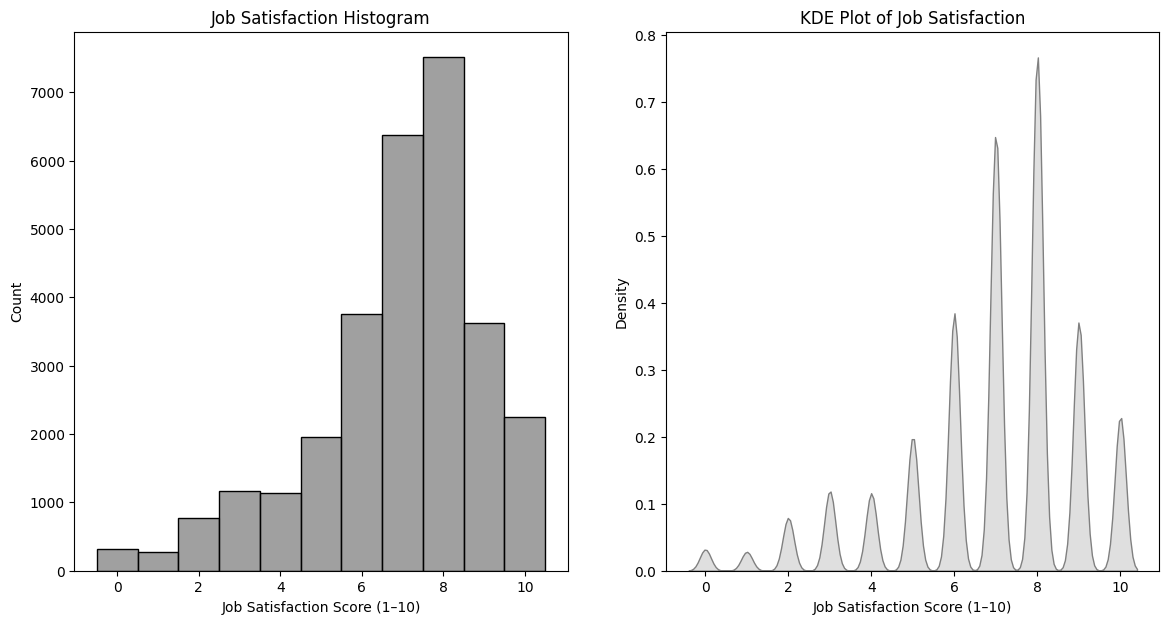

In [15]:
plt.figure(figsize=(14, 7))
# Pie Chart
plt.subplot(1, 2, 1)
sns.histplot(data_subset['JobSat'], bins=10, kde=False, color='grey', discrete=True)
plt.title('Job Satisfaction Histogram')
plt.xlabel('Job Satisfaction Score (1–10)')
plt.ylabel('Count')
# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data_subset['JobSat'], fill=True, bw_adjust=0.5, color='grey')
plt.title('KDE Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction Score (1–10)')
plt.ylabel('Density')

plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [16]:
data_language = data_subset[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna().reset_index(drop=True)
data_language.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,JavaScript;Python;Ruby,C#;Crystal;Java;JavaScript;Python;Ruby
1,Bash/Shell (all shells);C#;JavaScript;PowerShe...,Bash/Shell (all shells);JavaScript;VBA
2,C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...,C#;SQL
3,C#;HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;SQL
4,Bash/Shell (all shells);HTML/CSS;PHP;Python;SQ...,C++;Java;JavaScript;PHP;PowerShell;Python;R;SQL


In [17]:
data_language['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                                  512
Python                                                                                                          281
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                           246
HTML/CSS;JavaScript;PHP;SQL                                                                                     215
C#                                                                                                              208
                                                                                                               ... 
Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;PowerShell;Rust;TypeScript;Zig                                1
Assembly;Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;Julia;Lua;MATLAB;MicroPython;Python;Rust;VBA      1
Java;MATLAB;Python;SQL                           

In [18]:
data_language['LanguageWantToWorkWith'].value_counts()

LanguageWantToWorkWith
Rust                                                                                                360
HTML/CSS;JavaScript;TypeScript                                                                      332
Python                                                                                              319
C#                                                                                                  250
Go                                                                                                  238
                                                                                                   ... 
Bash/Shell (all shells);Dart;Erlang;Go;HTML/CSS;JavaScript;Kotlin;PHP;Python;Rust;SQL;TypeScript      1
C;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Rust;TypeScript;Zig                                          1
Bash/Shell (all shells);C;C#;C++;HTML/CSS;Lua;PowerShell;SQL;TypeScript                               1
Elixir;HTML/CSS;JavaScript;Kotlin;Rust;Sw

In [19]:
from collections import Counter

# Split languages and count occurences
have_worked = [lang.strip() for langs in data_language['LanguageHaveWorkedWith'].str.split(';') for lang in langs if lang.strip()]
want_to_work = [lang.strip() for langs in data_language['LanguageWantToWorkWith'].str.split(';') for lang in langs if lang.strip()]
have_worked_counts = dict(Counter(have_worked).most_common(10)) # 10 most common only
want_to_work_counts = dict(Counter(want_to_work).most_common(10))

print(have_worked_counts)
print(want_to_work_counts)

{'JavaScript': 17498, 'SQL': 15328, 'HTML/CSS': 14601, 'Python': 13696, 'TypeScript': 11971, 'Bash/Shell (all shells)': 10303, 'Java': 8266, 'C#': 8116, 'C++': 5552, 'PHP': 5013}
{'Python': 12056, 'SQL': 11884, 'JavaScript': 11775, 'TypeScript': 10909, 'HTML/CSS': 10239, 'Rust': 8821, 'Go': 7457, 'Bash/Shell (all shells)': 7117, 'C#': 6859, 'Java': 5168}


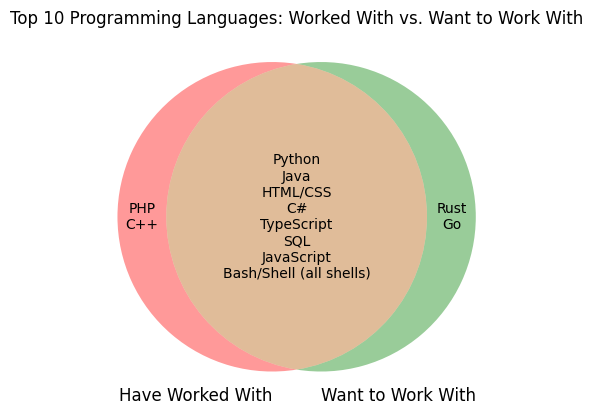

In [20]:
from matplotlib_venn import venn2

# Venn Diagram
venn = venn2([set(have_worked_counts), set(want_to_work_counts)], set_labels=('Have Worked With', 'Want to Work With'))
venn.get_label_by_id('100').set_text('\n'.join(set(have_worked_counts) - set(want_to_work_counts)))
venn.get_label_by_id('010').set_text('\n'.join(set(want_to_work_counts) - set(have_worked_counts)))
venn.get_label_by_id('110').set_text('\n'.join(set(have_worked_counts) & set(want_to_work_counts)))
plt.title('Top 10 Programming Languages: Worked With vs. Want to Work With')
plt.show()

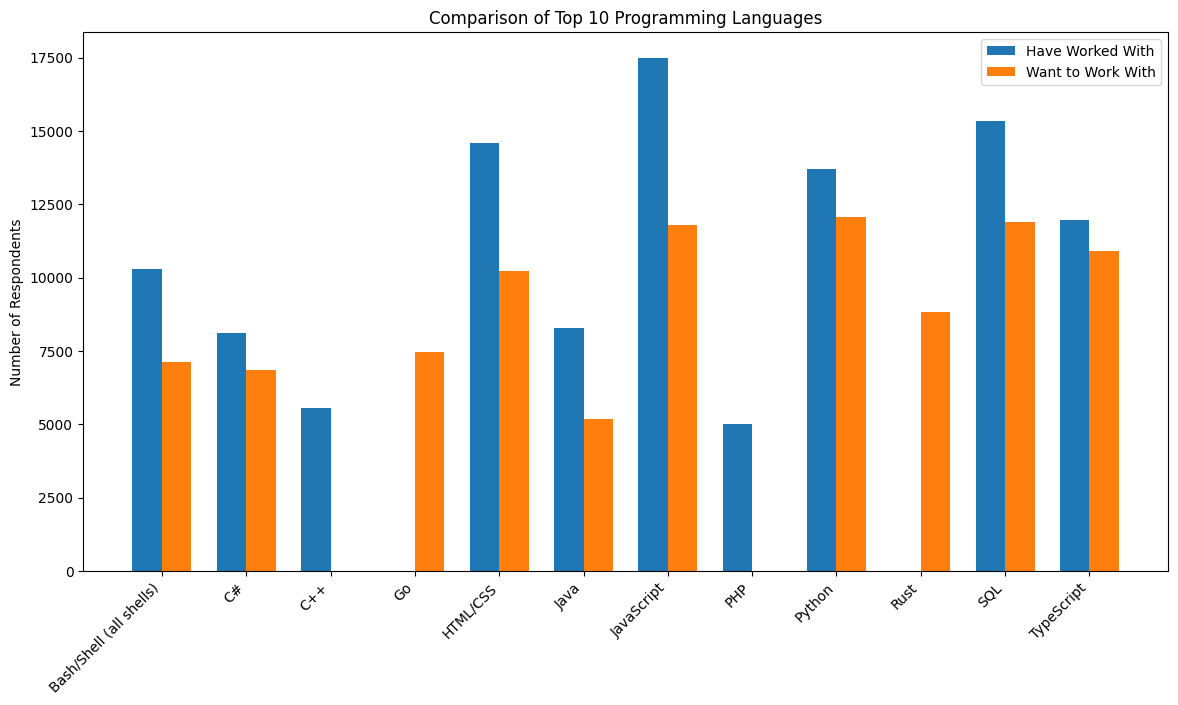

In [21]:
# Grouped Bar Chart
languages = sorted(set(have_worked_counts) | set(want_to_work_counts))
have_counts = [have_worked_counts.get(lang, 0) for lang in languages]
want_counts = [want_to_work_counts.get(lang, 0) for lang in languages]
x = range(len(languages))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar([i - width/2 for i in x], have_counts, width, label='Have Worked With')
rects2 = ax.bar([i + width/2 for i in x], want_counts, width, label='Want to Work With')
ax.set_ylabel('Number of Respondents')
ax.set_title('Comparison of Top 10 Programming Languages')
ax.set_xticks(x)
ax.set_xticklabels(languages, rotation=45, ha='right')
ax.legend()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [22]:
remotework = data_subset[['RemoteWork', 'Country']].dropna().reset_index(drop=True)
remotework.head()

,RemoteWork,Country
0,Remote,United States of America
1,"Hybrid (some remote, some in-person)",United States of America
2,"Hybrid (some remote, some in-person)",Switzerland
3,"Hybrid (some remote, some in-person)",Germany
4,"Hybrid (some remote, some in-person)",Germany


In [23]:
remotework['RemoteWork'] = remotework['RemoteWork'].replace('Hybrid (some remote, some in-person)', 'Hybrid')
remotework['RemoteWork'].value_counts()

RemoteWork
Hybrid       12622
Remote       11103
In-person     5392
Name: count, dtype: int64

In [24]:
remotework['Country'].value_counts()

Country
United States of America                                5533
Germany                                                 2589
India                                                   2009
United Kingdom of Great Britain and Northern Ireland    1597
Ukraine                                                 1235
                                                        ... 
Niger                                                      1
Lesotho                                                    1
Botswana                                                   1
Monaco                                                     1
Haiti                                                      1
Name: count, Length: 166, dtype: int64

In [25]:
countries = ['USA', 'Germany', 'India', 'Ukraine']
remotework = remotework[remotework['Country'].isin(countries)]
remotework_cross = pd.crosstab(remotework['RemoteWork'], remotework['Country'], normalize='columns')
remotework_cross

Country,Germany,India,Ukraine
RemoteWork,,,
Hybrid,0.582078,0.396715,0.203239
In-person,0.142912,0.361374,0.041296
Remote,0.275010,0.241911,0.755466


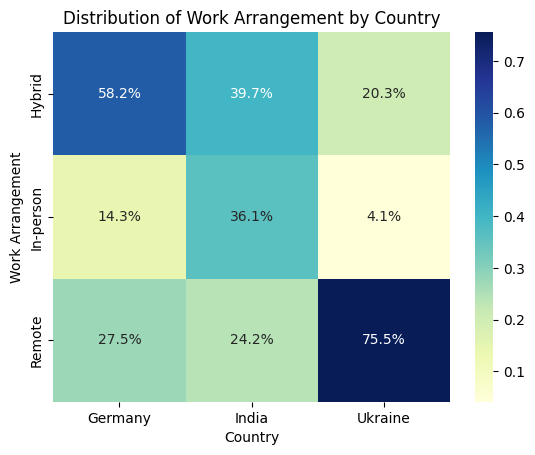

In [26]:
sns.heatmap(remotework_cross, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Distribution of Work Arrangement by Country')
plt.xlabel('Country')
plt.ylabel('Work Arrangement')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [27]:
jobsat_corr = data_subset[['JobSat', 'YearsCodePro']].dropna().reset_index(drop=True)

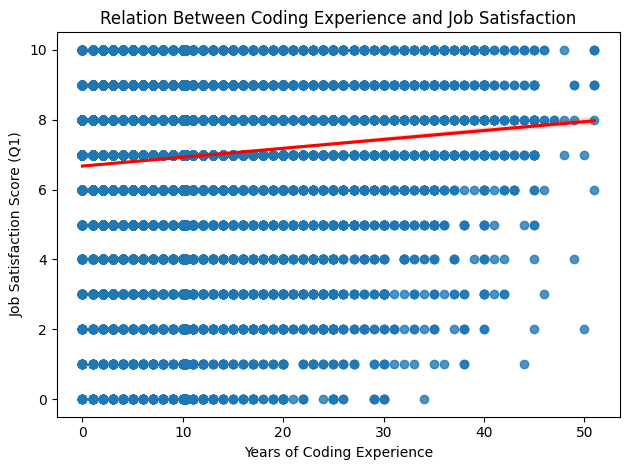

In [28]:
sns.regplot(data=jobsat_corr, x='YearsCodePro', y='JobSat', line_kws={'color': 'red'})
plt.title('Relation Between Coding Experience and Job Satisfaction')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Job Satisfaction Score (Q1)')
plt.tight_layout()
plt.show()

In [29]:
# Pearson correlation coefficient
correlation_pearson = jobsat_corr['JobSat'].corr(jobsat_corr['YearsCodePro'], method='pearson')
print(f"Pearson correlation coefficient: {correlation_pearson}")

# Spearman correlation coefficient
correlation_spearman = jobsat_corr['JobSat'].corr(jobsat_corr['YearsCodePro'], method='spearman')
print(f"Spearman correlation coefficient: {correlation_spearman}")

Pearson correlation coefficient: 0.10210764725384082
Spearman correlation coefficient: 0.11461195407579211


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [30]:
data_subset['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          13126
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        8414
Some college/university study without earning a degree                                 3340
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1508
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         1401
Associate degree (A.A., A.S., etc.)                                                     903
Something else                                                                          289
Primary/elementary school                                                               145
Name: count, dtype: int64

In [31]:
# Standardize education Level
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate/Prof. Degree',
    'Something else': 'Other'
}

data_subset['EdLevel'] = data_subset['EdLevel'].replace(edlevel_mapping)
data_subset['EdLevel'].value_counts()

EdLevel
Bachelor’s Degree         13126
Master’s Degree            8414
Some College               3340
High School                1508
Doctorate/Prof. Degree     1401
Associate Degree            903
Other                       289
Primary School              145
Name: count, dtype: int64

In [32]:
emp_cross = data_subset[['Employment', 'EdLevel']].dropna().reset_index(drop=True)
emp_cross.head()

,Employment,EdLevel
0,Employed,Bachelor’s Degree
1,Employed,Bachelor’s Degree
2,Employed,Some College
3,Employed,Some College
4,Employed,Master’s Degree


In [33]:
emp_cross = pd.crosstab(data_subset['Employment'], data_subset['EdLevel'], normalize='index')
emp_cross

EdLevel,Associate Degree,Bachelor’s Degree,Doctorate/Prof. Degree,High School,Master’s Degree,Other,Primary School,Some College
Employment,,,,,,,,
Employed,0.029959,0.463057,0.051168,0.041038,0.298948,0.009527,0.004526,0.101776
Multiple,0.037164,0.409654,0.035028,0.099957,0.227040,0.012815,0.007689,0.170654
Self-employed,0.027309,0.374297,0.040161,0.070683,0.333333,0.006426,0.003213,0.144578
Unemployed,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


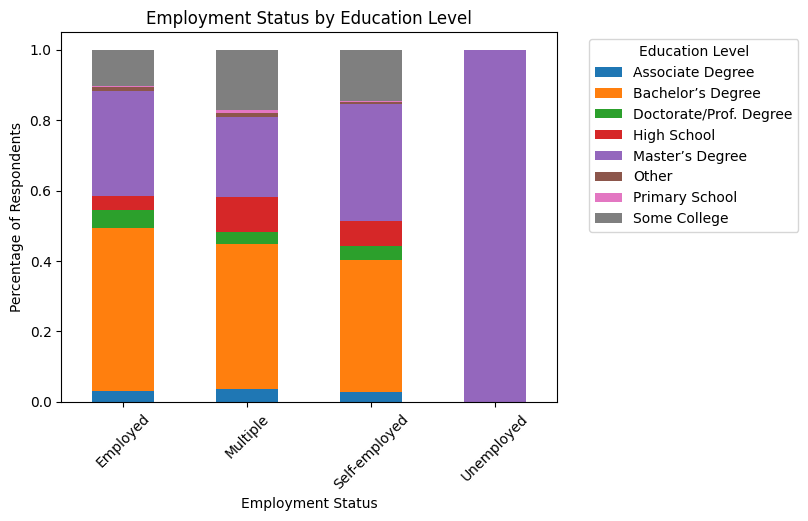

In [34]:
emp_cross.plot(kind='bar', stacked=True)
plt.title('Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [35]:
data_subset.to_csv('cleaned_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
